In [31]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import font_manager, rc
from matplotlib import style
from textblob.classifiers import NaiveBayesClassifier
from textblob import TextBlob
f = open('trainData.txt')
lines = f.readlines()
count=0
train = []
for line in lines:
    #print(line)
    #print(line[-1])
    line = line.strip()
    line = line.replace("\t", "")
    train.append((line[:-1], line[-1]))
    count+=1
    
print(count)
print(train)
cl = NaiveBayesClassifier(train)

1001
[('癤풵ow... Loved this place.', '1'), ('Crust is not good.', '0'), ('Not tasty and the texture was just nasty.', '0'), ('Stopped by during the late May bank holiday off Rick Steve recommendation and loved it.', '1'), ('The selection on the menu was great and so were the prices.', '1'), ('Now I am getting angry and I want my damn pho.', '0'), ("Honeslty it didn't taste THAT fresh.)", '0'), ('The potatoes were like rubber and you could tell they had been made up ahead of time being kept under a warmer.', '0'), ('The fries were great too.', '1'), ('A great touch.', '1'), ('Service was very prompt.', '1'), ('Would not go back.', '0'), ('The cashier had no care what so ever on what I had to say it still ended up being wayyy overpriced.', '0'), ('I tried the Cape Cod ravoli, chicken,with cranberry...mmmm!', '1'), ('I was disgusted because I was pretty sure that was human hair.', '0'), ('I was shocked because no signs indicate cash only.', '0'), ('Highly recommended.', '1'), ('Waitress wa

In [30]:
cl.show_informative_features(10)

Most Informative Features
            contains(no) = True                0 : 1      =     12.3 : 1.0
       contains(amazing) = True                1 : 0      =      9.0 : 1.0
         contains(being) = True                0 : 1      =      9.0 : 1.0
      contains(friendly) = True                1 : 0      =      7.0 : 1.0
    contains(atmosphere) = True                1 : 0      =      6.3 : 1.0
          contains(much) = True                0 : 1      =      6.2 : 1.0
       contains(another) = True                0 : 1      =      5.7 : 1.0
         contains(worst) = True                0 : 1      =      5.7 : 1.0
          contains(cold) = True                0 : 1      =      5.7 : 1.0
          contains(nice) = True                1 : 0      =      5.3 : 1.0


In [32]:
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)
style.use('ggplot')

username Tag : j_corden
Scrolling........

Searching posts url.......
Total posts found = 24
Scrolling........

Searching posts url.......
Total posts found = 29
https://www.instagram.com/p/Bx_yQIXHHAN/

[Ruth Jones and I have been keeping this secret for a while... We’re excited to share it with you. See you on Christmas Day @BBCOne #GavinandStacey]
0
https://www.instagram.com/p/BwcfpDgn5_A/

[I’m a Blink now. Deal with it. @blackpinkofficial 📸:@terencepatrick]
1
https://www.instagram.com/p/BwYZzaTHZgo/

[📸: @terencepatrick]
1
https://www.instagram.com/p/BwBHJthHtbZ/

[So you think you can pat? I'm working my #PiteraEssence. Full episode out on @skii YouTube #BareSkinChat #skiipartner]
1
https://www.instagram.com/p/BvUwtnJnh2n/

[oh hey @celinedion]
1
https://www.instagram.com/p/BuozgQ3n9sX/

[Last night was our 600th @latelateshow and I would like to thank these three fantastic guys for making it such a fun one! #LateLateJonas @jonasbrothers x]
1
https://www.instagram.com/p/BubgzJjnR

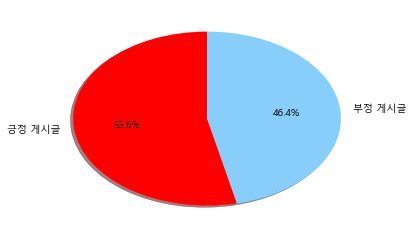

In [33]:
from konlpy.tag import Twitter
from textblob.classifiers import NaiveBayesClassifier
from textblob import TextBlob
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from urllib.request import Request, urlopen
from bs4 import BeautifulSoup
import time
import logging as logger
import os
import requests
import re


class Instagram:
    def __init__(self, driverPath=None, url=None, count=None):
        self.driverPath = driverPath
        self.url = url
        self.count = count
        self.postsUrls = []
        self.images=[]
        self.videos=[]
    
    # chromeDriver를 사용하기위해 설정하는 함수 
    def loadDriver(self):
        try:
            if self.driverPath is None:  # chromedriver의 위치가 맞게 지정되었나
                logger.error("Please provide a driver path")
                return
            self.driver = webdriver.Chrome(executable_path = self.driverPath)
            self.getUrl();
        except Exception as e:
            logger.error(str(e))
            
    # url 입력 후 진입하는 함수, scrollEnd 함수로 이어짐
    def getUrl(self):
        try:
            if self.driver is None:
                logger.error("Please provide an url")
                return
            self.driver.get(self.url)
            self.scrollEnd()
        except Exception as e:
            logger.error(str(e))
    
    # 
    def scrollEnd(self):
        SCROLL_PAUSE_TIME = 2
        last_height = self.driver.execute_script("return document.body.scrollHeight")
        # driver.execute_script : 사이트 로딩 후 함수 진행
        while True:
            print("Scrolling........")
            path = self.driver.find_elements_by_xpath("//*[@class='v1Nh3 kIKUG  _bz0w']//a")
            self.getPostUrls(path) # getPostUrls 함수 
            self.driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")
            time.sleep(SCROLL_PAUSE_TIME) 
            new_height = self.driver.execute_script("return document.body.scrollHeight")
            if new_height == last_height:
                self.getPost() #getPost 함수 
                return
            last_height = new_height
            
            
    def getPostUrls(self, path):
        print("\nSearching posts url.......")
        for p in path:
            url = p.get_attribute("href")
            if url not in self.postsUrls:
                self.postsUrls.append(url)
                
        print("Total posts found = " + str(len(self.postsUrls)))
        # print(self.postsUrls)
        
    def getPost(self):
        posCount = 0
        negCount = 0
        negPosts = []
        pieCount = []
        pieName = ['긍정 게시글', '부정 게시글']
        for url in self.postsUrls:
            print(url+"\n")
            self.driver.execute_script("window.open('"+url+"', '_self')")
            self.driver.implicitly_wait(2)
            testRes = self.CrawlPosts(self.driver) #CrawlPosts 함수 실행
            print(testRes)
            if testRes == '1':
                posCount+=1
            elif testRes == '0':
                negCount+=1
                negPosts.append(url)
            # driver.execute_script : 사이트 로딩 후 함수 진행
            
            #이미지 로드 
#             imagesXpath = self.driver.find_elements_by_xpath("//*[@class='FFVAD']")
#             for x in imagesXpath:
#                 img = x.get_attribute("srcset")
#                 img = img.split(",")
#                 img = img[-1][:-6]
#                 print(img)
#                 if img not in self.images and img is not None:
#                     self.images.append(img)
                    
#             videosXpath = self.driver.find_elements_by_xpath("//*[@class='tWeCl']")
#             for v in videosXpath:
#                 video = v.get_attribute("src")
#                 if video not in self.videos and video is not None:
#                     self.videos.append(video)
                
#         print("\nTotal Images found = " + str(len(self.images)))
#         print(self.images)
#         print("\nTotal Videos found = " + str(len(self.videos))) 
#         print(self.videos)    
        
        colors = ['red', 'lightskyblue']
        pieCount.append(posCount)  # 원그래프를 그리기 위해 값 대입
        pieCount.append(negCount)
        explode = (0.0, 0.0)
        print("\nSearching Success..")
        print("posCount :", posCount)
        print("부정적인 게시글이", negCount,"개 있습니다")
        print("부정적인 게시글 목록 : ", negPosts)
        plt.pie(pieCount, explode=explode, labels=pieName, colors=colors, autopct='%1.1f%%'
                , shadow = True, startangle=90)
        plt.show()
        self.driver.close()
        
        
    def CrawlPosts(self, driver):
        
        soup = BeautifulSoup(driver.page_source, "html.parser")
        count_tag = soup.find("li",{"class":"gElp9 rUo9f PpGvg "})
        if count_tag is None:
            print("No Posts")
            res = -1
        else:
            count_tag = count_tag.find_all("span")
            count_tag = count_tag[1:]
            count_tag = str(count_tag)
            tag = re.sub('<.+?>', '', count_tag, 0).strip()
            tag = str(tag)
            print(tag)
            testText = tag
            blob = TextBlob(testText, classifier=cl)
            res = blob.classify()
            #print(res)
        return res
                
       
    
if __name__ == "__main__":
    driverPath = r"C:/Users/USER/chromedriver"
    userTag = input("username Tag : ")
    url = "https://www.instagram.com/"+userTag
    count = 500
    
    instagram = Instagram(
        driverPath = driverPath,
        url = url,
        count = count
    )
    instagram.loadDriver()

    